# Machine Learning and Statistices 
# Project 2019
### Student:    David O'Brien
### Student ID: G00364766  

## Boston House Prices Dataset

# 1 - Introduction
This assessment relates to the well known Boston House Prices dataset.  The dataset was collected by the US government and was originally published by Harrison, D and Rubinfeld, DL 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol. 5, 81-102,1978.  It records a number of different variables for neighbourhoods in the Boston area.  It has been widely used and documented online in relation to the study of descriptive analysis and machine learning predictions.

The aim of this jupyter notebook is to describe the dataset using various plots and tables.  I will also use some inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that arent.  Finally, I will create a model that will predict the median house of prices based on other variables within the dataset

In [6]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
import keras as kr
import sklearn.model_selection as mod
import sklearn.preprocessing as pre

# 2 - Describe
The Boston House Prices Dataset contains the price of houses for different neighbourhoods in Boston.  There are are number of other variables within the dataset, all of which are outlined below:


Variable | Description
-----|------
crim | per capita crime rate by town
zn | proportion of residential land zoned for lots over 25,000 sq.ft.
indus | proportion of non-retail business acres per town
chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
nox | nitrogen oxides concentration (parts per 10 million)
rm | average number of rooms per dwelling
age | proportion of owner-occupied units built prior to 1940
dis | weighted mean of distances to five Boston employment centres
rad | index of accessibility to radial highways
tax | full-value property-tax rate per $10,000
ptratio | pupil-teacher ratio by town
black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
lstat | lower status of the population (percent)
medv | median value of owner occupied home in thousands

The first thing we will do is start exploring the dataset set to get some descriptive statistics and have a better understanding of what its about

In [7]:
# load data set and add column headers
df = pd.read_csv("bostondata.csv")

In [8]:
# lets have a look at the summary statistcs
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The above table show us that there is 506 rows of data with 14 attributes.  One of the more interesting variables here is the medv column.  This column represents the median value of homes.  In the next section We will look at comparing the value of houses to the other variables within the dataset

In [9]:
# check the data to see if there is anything missing or are NaNs
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

The above shows us that there are no NaN's and therefore we do not need to clean the data

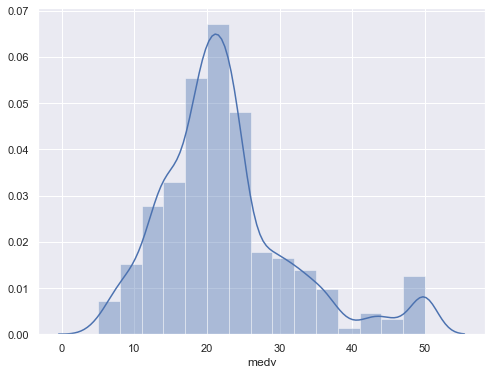

In [10]:
# plot the distribution of house prices: Adapted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(df['medv'], bins=15)
plt.show()


The above graph indicates a normal distribution of house prices.  We can also see that the mean house price is around the 22 range which ties in with our 'describe' table above.  Lets take some of the variables and have a look at the pairwise realationships.  We will look at the variables "crim", "chas" "rm", "medv", "lstat" and "age" 

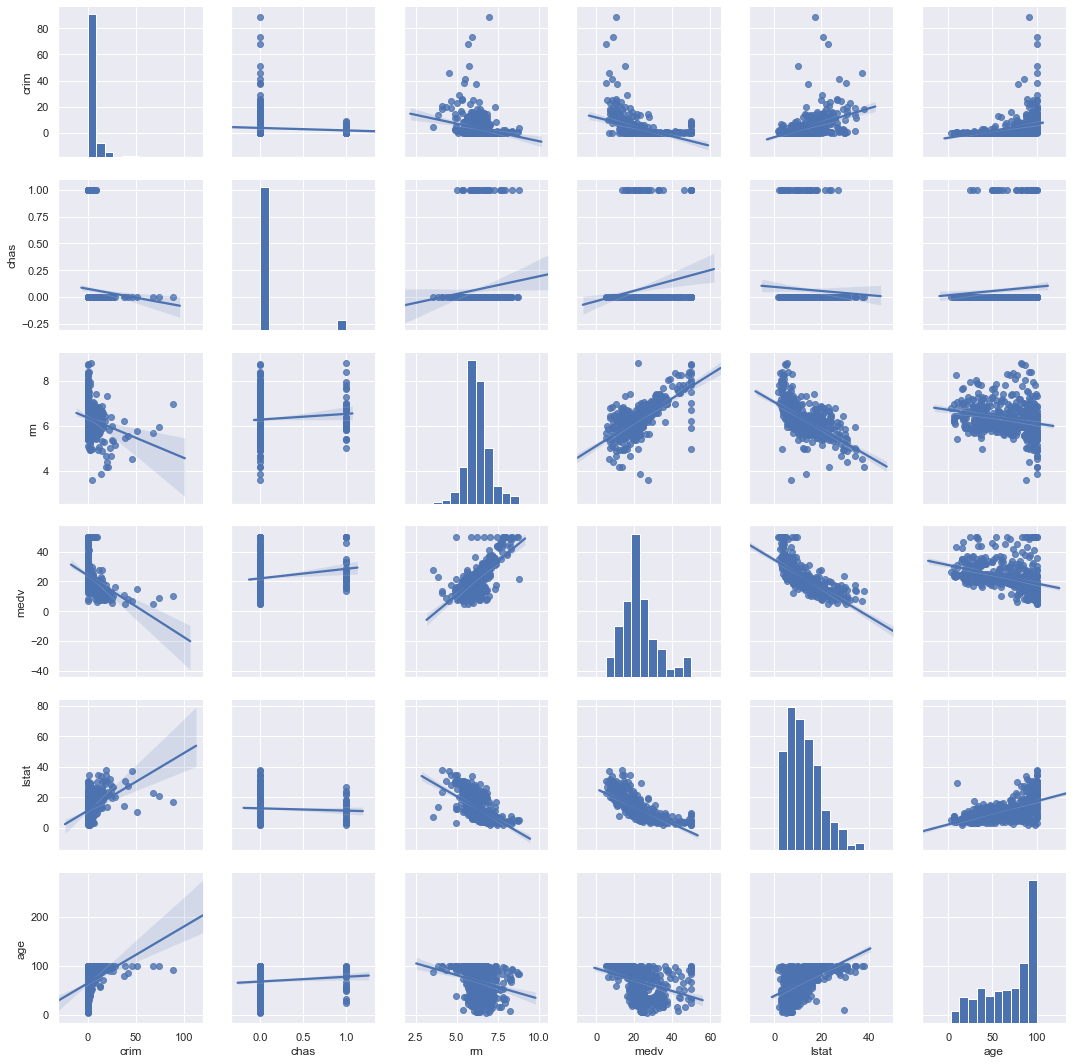

In [11]:
# plot pairwise relationships in the dataset fitting linear regression models to the scatter plots
sns.pairplot(df, vars=["crim", "chas","rm", "medv","lstat","age"], kind="reg") 

The bullet points below give some comments on the pairwise relationships.  From the plots above, we can see that the chas variable is binary, it is either a yes or no.  I have not included the chas variable in the points below.  This is something we will look at further in the next section to see if the value of houses is affected by whether or the not the neighbourhood bounds the Charles river.  
 - crim v rm - One would not expect a strong relationship between room numbers and crime rate, but the plot does indicate that crime rate is lower in neighbourhoods with fewer numbers of rooms per dwelling 
 - crim v medv - the plot indicates that neighbourhoods with lower value houses may have a higher crime rate
 - rm - medv - one would expect that the value of a house would increase as the room number increases and this plot indicates that relationship
 - medv v lstat - this plot seems to have a strong negative correlation
 - looking at the histograms in the diagonal line from top left to bottom right, it can be seen the RM and MEDV have the closest shape to a normal distribution. Crim and lstat are skewed to the left, while age is skewed to the right

# 3 - Infer
In this section, we have been asked to use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that arent.  We will try to use some of the methods below to check this out.  The variables we are interested in for this are "chas" and "medv".
 
- Correlations
- Chi-square test
- McNemars test
- Independent t-test
- Paired sample t-test
- Welch's t-test
- Wilcoxon signed-rank test
- Linear regression
- Logistic regression
- One-way analysis of variance (ANOVA)
- Two-way/N-way ANOVA



# 3.1 - Correlations

The correlation matrix below indicates the correlation betweeen the different variables.  The correlation of a variable with itself if 1 i.e. they are the same.  The closer the value to one, the higher the correlations.  The first plot is a heatmap of the correlations - it is a useful visualisation tool for quickly spotting correlations

We can see from these plots that the correlation between 'chas' and the 'medv' variable is 0.18 indicating that there isnt a strong correlation.

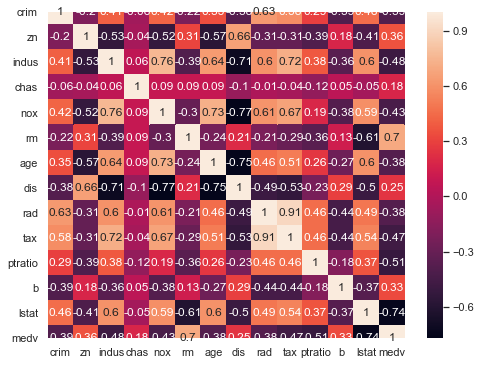

In [12]:
# adapted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [53]:
# Lets show the above heatmap in table format
correlation_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


## 3.2 - Independent T-Test
Lets assume that there is a given difference between the means of the house prices along the river and the house prices not bounding the river. Carry out an independent T-Test to see how different they are


In [54]:
# lets look at the data in the chas and medv variables
df[['chas','medv']]

,chas,medv
0,0,24.0
1,0,21.6
2,0,34.7
3,0,33.4
4,0,36.2
...,...,...
501,0,22.4
502,0,20.6
503,0,23.9
504,0,22.0


In [11]:
#lets look at medv variable in the neighbourhoods that are along the Charles river - value is 1
df[df['chas'] == 1]['medv']

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: medv, dtype: float64

In [12]:
#lets look at medv variable in the neighbourhoods that are NOT along the Charles river - value is 0
df[df['chas'] == 0]['medv']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 471, dtype: float64

In [13]:
#lets try an independent t-test on this data
ss.ttest_ind(df[df['chas'] == 1]['medv'], df[df['chas'] == 0]['medv'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The pvalue calculated above is very low indicating that the mean values are NOT the same.  Lets plot a histogram to see if there any differences

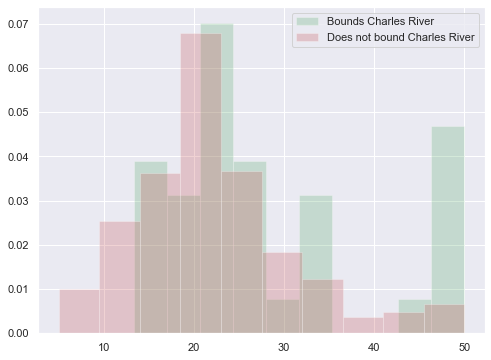

In [56]:
# plot histogram of the medv variable against the chas variable
plt.hist(df[df['chas'] == 1]['medv'], density=True, color='g', alpha = 0.25, label="Bounds Charles River")
plt.hist(df[df['chas'] == 0]['medv'], density=True, color='r', alpha = 0.25, label="Does not bound Charles River")

# display legend
plt.legend()
plt.show()

The green histogram in the above plot might indicate that some of the house prices are higher in neighbourhoods that bound the Charles River.  

## 3.3 - One way Anova

Below we will attempt a one way Anova to compare the means again.  When carrying out an Anova test, there are three assumptions that need to be met to consider the results accurate:
 - Normality - Looking at the histograms avove, it seems that both are normally distributed, so is it safe to assume we have met this assumption?  A Shapiro Wilks test can be used to test for Normality.  It is also noted that for large N, the assumption for Normality can be relaxed, so the result of this test may not affect our decision in carrying out an Anova
 - Homogeneity of variance - The assumption of homogeneity of variance is that the variance within each of the populations is equal. A Levene's test can be used to test for equal variances
 - Independent observations - this means that the value of one observation does not influence or affect the value of other observations.  We have met this assumption in the case of our data
 
 So, lets see if our data meets the first two assumptions:
 


### 3.3.1 - Testing for normality

In [121]:
#Check for normality for houses bound by the river Charles
ss.shapiro(df[df['chas'] == 1]['medv'])

(0.8359232544898987, 0.00011230883683310822)

In [122]:
#Check for normality for houses NOT bound by the river Charles
ss.shapiro(df[df['chas'] == 0]['medv'])

(0.9282605051994324, 3.113930960958397e-14)

We can see from the calculation of the Shapiro test above the following:

River Charles | W statistic | P Value
-----|------ |------
Bounds | 0.836 | 0.000
Does not Bound | 0.928 | 0.000

As the P values for both are less than 0.05, then the null hypothesis that the data are normally distributed is reject

### 3.3.2 - Testing for equal variance

In [123]:
ss.levene(df[df['chas'] == 1]['medv'],df[df['chas'] == 0]['medv'])

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

We can see from the calculation of the Levene test above the W statistic is 4.59 and the P value is 0.033.  As the P value is less than 0.05, this indicates strong evidence against the null hypothesis,  and means that variances are not equal.

### 3.3.3 - Anova conclusion
As the above tests confirm that 2 of the 3 assumptions aren't being met, I think it would be unreasonable to perform an Anova test on the data

## 3.4 - Inferential Statistics Summary
Although the above analysis indicates that there is a significant difference between median house prices between houses that are along the Charles river and those that aren't, I do not think we can take this as a given due to the small quantity of values that bound the Charles river.

Upon further analysis of the 'chas' variable below, we can see from the below histogram there are significantly more values for neighbourhoods that do not bound the charles river:
 - 471 values do not bound the charles river
 - 35 values bound the charles river

This would lead me to believe that it would be difficult to gain any useful insights using the '1' (or 'bounds the Charles river') element of the 'chas' variable due to the low quantity of data points

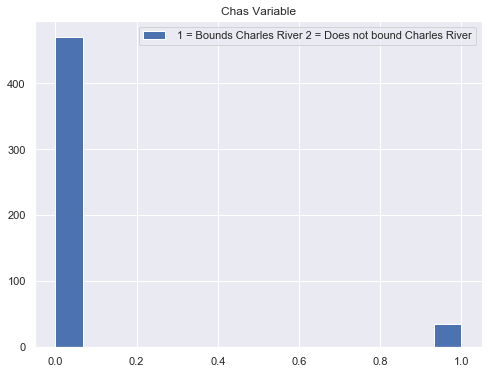

In [124]:
#lets plot a histogram of the 'Chas' variable
plt.hist(df['chas'], bins=15,label=" 1 = Bounds Charles River 2 = Does not bound Charles River")
# display legend
plt.legend()
plt.title('Chas Variable')
plt.show()

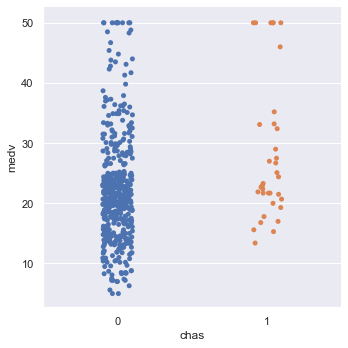

In [101]:
# lets do a more descriptive plot of the data above
sns.catplot(x="chas", y="medv", data=df);

# 4 - Predict
In this chapter, we will aim to produce a neural network to predict the median house price based on other variables within the dataset.

Neural networks map inputs to outputs and finds correlations.  They learn to approximate an unknown function between inputs and outputs.  Things we need to consider when looking at neural networks are

 - What outcomes do I care about and
 - Do I have the data to do this
 
For this project, we can use the data file for the boston housing prices.  The outcomes we are interested in are the median house prices.  Based on the exploratory analysis carried out under the previous headings, the main variables that seem to be affecting the house prices are:
 - crim - house prices are higher in lower crime rate areas
 - rm - house prices are higher where there are more rooms
 - lstat - as house prices get higher, lower status of the population (percent) decreases

## 4.1 - Inputs and Outputs

In [24]:
# lets define the inputs for the neural network, we will start with one input to see if we can get it predicting accurately
# Note when we are using more than one variable, we will need to make sure the scale of our variables is similar, otherwise
# the initialiazation of the neural network will be difficult
# input = df[['crim']]
# input = df[['rm']]
# input = df[['lstat']]
# input = df[['crim','lstat']]
# input = df[['crim','rm','lstat']]
input = df[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']]
input

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [25]:
# lets define the outputs for the neural network, medv being our target variable
output = df['medv']
output

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

## 4.2 - Build Model
In the code below, I have defined the function that will build the model which will be trained to predict the median value of houses.  We will split our dataset into a training and test set.  The training set will be used to 'train' the data and check the models ability predict unseen data on the test set.  In training the network, I have experimented by using a combination of:
 - different number of layers, 
 - different activations including 'linear', 'tanh', 'sigmoid','relu', 'hard_sigmoid', 'exponential','softplus'
 - different optimization algoritms 'SGD', 'Adam', 'RMSprop'
 - different loss functions 'mean_absolute_error', 'mean_squared_logarithmic_error', 'hinge'

By repeating this process, and changing the different parameters within the functions, the validation loss can be recorded and we can see if our model is improving. When selecting our model, we will look at which one performs best on the test set.

When building the model using different activation layers, it was noticed that the loss improved significantly when used with the relu and softplus activations.  Also, initially, I started using only one variable, but the losses shown here were not improving significantly enough to warrent this model.  Upon adding all the variables of the dataset to the model, this also improved the loss.  This makes sense, as the model has more information to train itself on. Another element that reduced the loss was increasing the epochs from 10 to 30 when fitting the model.  This brought the loss down to 17.28

To get a better idea of if our model is working, we need to record the losses produced when training the model.  To do this

Any sign of overfitting may be obvious by showing a low training loss and a high test loss.  

In [26]:
# split the inputs and outputs into training and test sets.  The code below tells sckit-learn that the test size will be 50% of the overall dataset
input_train, input_test, output_train, output_test = mod.train_test_split(input, output, test_size=0.5)
print(input_train.shape, input_test.shape, output_train.shape, output_test.shape)

(253, 13) (253, 13) (253,) (253,)


In [27]:
# Adapted from lecturers jupyter notebooks on 'keras-neurons' and 'keras-and-iris'
# Start a neural network, building it by layers.
m = kr.models.Sequential()

# Add a layers to the neural network
m.add(kr.layers.Dense(50, input_dim=13, activation="linear")) # this is the first layer of the model, and it makes the input shape clear i.e. 1 variable
m.add(kr.layers.Dense(200, activation="linear"))
# m.add(kr.layers.Dense(50, activation="softplus"))
m.add(kr.layers.Dense(200, activation="linear"))
m.add(kr.layers.Dense(200, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear")) # only one neuron as we only want one output, our predicted value

In [28]:
# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam") #, metrics=['accuracy']

In [29]:
# Train the network
history = m.fit(input_train, output_train, validation_split=0.2, epochs=30, batch_size=10)

Train on 202 samples, validate on 51 samples
Epoch 1/30
202/202 [==============================] - 1s 4ms/step - loss: 5209.5743 - val_loss: 1214.5896
Epoch 2/30
202/202 [==============================] - 0s 360us/step - loss: 412.4918 - val_loss: 80.2781
Epoch 3/30
202/202 [==============================] - 0s 336us/step - loss: 90.6601 - val_loss: 44.7190
Epoch 4/30
202/202 [==============================] - 0s 415us/step - loss: 71.6666 - val_loss: 36.5418
Epoch 5/30
202/202 [==============================] - 0s 390us/step - loss: 69.1246 - val_loss: 62.0677
Epoch 6/30
202/202 [==============================] - 0s 375us/step - loss: 73.8765 - val_loss: 125.6830
Epoch 7/30
202/202 [==============================] - 0s 380us/step - loss: 93.4631 - val_loss: 74.0026
Epoch 8/30
202/202 [==============================] - 0s 400us/step - loss: 77.9678 - val_loss: 72.6425
Epoch 9/30
202/202 [==============================] - 0s 400us/step - loss: 78.8419 - val_loss: 49.2143
Epoch 10/30
202

In [30]:
history.history
# Plot training values
# Plot training & validation accuracy values
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

{'val_loss': [1214.5895900352327,
  80.27811970430263,
  44.719008513525424,
  36.541845246857285,
  62.06771686439421,
  125.68299865722656,
  74.00255461300121,
  72.64246413286995,
  49.21430124021044,
  53.103023454254746,
  67.25917442172181,
  79.46572300032074,
  37.28023214901195,
  30.681172838398055,
  47.99661737329819,
  30.724181828399498,
  52.679948881560684,
  84.84307771570542,
  42.66112907260072,
  178.7638391232958,
  35.597593905879,
  33.075402175678924,
  35.089841057272515,
  24.719860708012302,
  28.063155997033213,
  23.650323792999867,
  41.778029004732765,
  120.51355130064721,
  63.499200035544,
  43.8626476058773],
 'loss': [5209.574302729994,
  412.4918497670995,
  90.6601165692405,
  71.6666125495835,
  69.12462081531487,
  73.87648417571984,
  93.4630896879895,
  77.96779626902968,
  78.84193591316148,
  95.63825493991965,
  94.68324294892868,
  71.6871079277284,
  81.2269864601664,
  64.55372536536491,
  56.57452672070796,
  67.93201774181706,
  63.530

In [31]:
score = m.evaluate(input_train, output_train, verbose=1)
score

253/253 [==============================] - 0s 55us/step


51.500533997305766

## 4.3 - Plot the loss and val-loss values

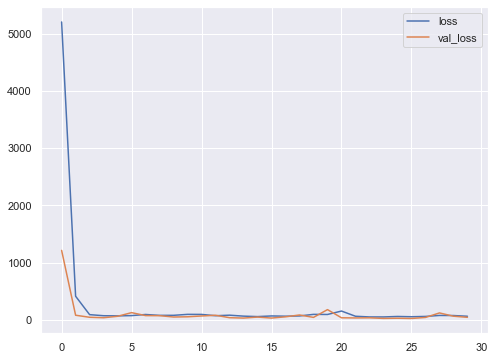

In [125]:
# adapted from https://stackoverflow.com/questions/39283358/keras-how-to-record-validation-loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [33]:
# lets show a summary of the model
m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_7 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 201       
Total params: 91,501
Trainable params: 91,501
Non-trainable params: 0
_________________________________________________________________


In [34]:
# lets predict the values of the test inputs
output_pred = m.predict(input_test)
# plot the values
# plt.plot(input1,p,'r-', label='Prediction')
# plt.plot(input1,output,'k:', label='Original')
# input1[:5]
output_pred

array([[31.998314 ],
       [27.406654 ],
       [22.554052 ],
       [19.186466 ],
       [30.80786  ],
       [34.68519  ],
       [14.473842 ],
       [31.346012 ],
       [27.669174 ],
       [25.896666 ],
       [20.403265 ],
       [34.9008   ],
       [15.023398 ],
       [46.69598  ],
       [ 7.060686 ],
       [25.92687  ],
       [27.173475 ],
       [15.3174305],
       [26.923532 ],
       [19.580873 ],
       [31.60922  ],
       [26.782362 ],
       [32.23855  ],
       [31.687155 ],
       [21.814024 ],
       [17.206001 ],
       [18.275198 ],
       [11.882347 ],
       [16.031916 ],
       [23.886847 ],
       [22.02617  ],
       [38.449764 ],
       [17.556595 ],
       [20.013567 ],
       [27.188581 ],
       [27.530603 ],
       [26.490736 ],
       [29.931181 ],
       [25.75379  ],
       [23.751474 ],
       [26.928242 ],
       [32.051548 ],
       [11.100044 ],
       [18.836178 ],
       [26.848951 ],
       [28.22415  ],
       [25.72788  ],
       [25.33

In [35]:
# compare these predictions (output_pred) to the original outputs (output_test)
output_test

340    18.7
319    21.0
375    15.0
486    19.1
35     18.9
       ... 
147    14.6
325    24.6
33     13.1
229    31.5
429     9.5
Name: medv, Length: 253, dtype: float64

## 4.4 - Predict the original output values using the model:

Text(0, 0.5, 'Prices(thousands)')

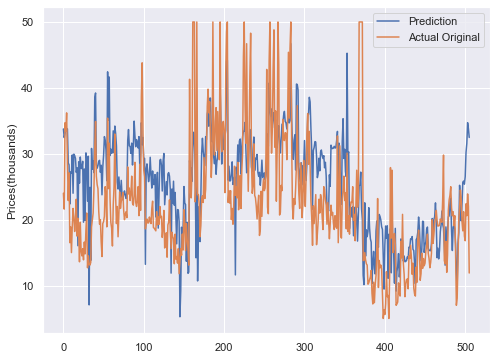

In [126]:
# Predict the original outputs
pred_orig = m.predict(input)
# Create a variable for the actual original outputs
actual_orig = output
# Plot these:
plt.plot(pred_orig, label='Prediction') 
plt.plot(actual_orig, label='Original')
plt.legend(['Prediction', 'Actual Original'])
plt.ylabel("Prices(thousands)")


Text(0, 0.5, 'Prices(thousands)')

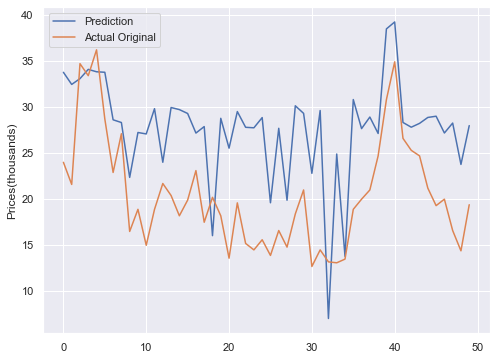

In [127]:
# lets focus on a subset within the above graph, we will look at 50 values:
plt.plot(pred_orig[:50], label='Prediction') 
plt.plot(actual_orig[:50], label='Original')
plt.legend(['Prediction', 'Actual Original'])
plt.ylabel("Prices(thousands)")

Looking at the above two plots, it looks like the shape of the lines are similar, in that the predicted values seem to follow the same pattern as the actual.  However, the models predicted values are lower than the actual values

## 4.5 - Preprocessing

In [21]:
x = df.iloc[:,0:13]
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


### 4.5.1 - One-off Scaling

In [23]:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
xscale = pd.DataFrame(pre.scale(x), columns=x.columns)
xscale

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


### 4.5.2 - Fitting and transforming

In [27]:
scaler = pre.StandardScaler()
scaler.fit(x)
scaler.mean_, scaler.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [28]:
xscale = pd.DataFrame(scaler.transform(x), columns=x.columns)
xscale

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


## References

1 - https://github.com/selva86/datasets/blob/master/BostonHousing.csv

2 - https://www.kaggle.com/c/boston-housing

3 - https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html

4 - https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

5 - https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

6 - https://pythonfordatascience.org/inferential-statistics/

7 - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

8 - https://seaborn.pydata.org/generated/seaborn.heatmap.html

9 - https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

10 - https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras

11 - https://skymind.ai/wiki/neural-network

12 - https://skymind.ai/wiki/neural-network

13 - https://www.ritchieng.com/machine-learning-project-boston-home-prices/

14 - https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341

15 - https://anujdutt9.github.io/LinearRegressionTF.html

16 - https://medium.com/@robertjohn_15390/simple-housing-price-prediction-using-neural-networks-with-tensorflow-8b486d3db3ca

17 - https://github.com/DavidCico/Boston-House-Prices-With-Regression-Machine-Learning-and-Keras-Deep-Learning/blob/master/Boston_deeplearning_regression.ipynb

18 - https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

19 - https://machinelearningmastery.com/train-final-machine-learning-model/

20 - https://github.com/rebeccak1/boston-housing/blob/master/boston_housing.ipynb

21 - https://www.datacamp.com/community/tutorials/deep-learning-python

22 - https://keras.rstudio.com/articles/tutorial_basic_regression.html

23 - https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

24 - https://books.google.ie/books?id=dadfDwAAQBAJ&pg=PA85&lpg=PA85&dq=predicting+house+prices+boston+dataset+keras&source=bl&ots=87QiUAaxaC&sig=ACfU3U3i-T3IsGZ-WyCM31dF2AVN1Luyug&hl=en&sa=X&ved=2ahUKEwjW2pez4vnlAhXkQxUIHXUpC984KBDoATAAegQICRAB#v=onepage&q=predicting%20house%20prices%20boston%20dataset%20keras&f=false

25 - https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

26 - http://davidmlane.com/hyperstat/A45619.html

27 - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

28 - https://sites.ualberta.ca/~lkgray/uploads/7/3/6/2/7362679/slides_-_anova_assumptions.pdf

29 - https://www.researchgate.net/post/How_to_perform_one_way_ANOVA_for_unequal_number_of_samples

30 - https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.shapiro.html

31 - https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

32 - http://www.jmp.com/support/notes/35/406.html

33 - https://en.wikipedia.org/wiki/Levene%27s_test

34 - https://scikit-learn.org/stable/modules/preprocessing.html

35 - 

36 - 

37 - 

38 - 





# ******************TEST CODE****************

In [96]:
df['chas'].groupby(['chas']).count()

TypeError: 'DataFrame' object is not callable